# Pre-lecture Questions 

### Question 1

A classification decision tree is used to address problems where the objective is to predict or categorize data into discrete, predefined classes or groups absed on input features.

These trees can tackle categorical outputs, which means that the target variable takes on a limited dnumber of distinct labels. 
The output type of classification deicision trees are outcomes that are cateogries, like "Fox/Dog", or "Yes/No".

The decision-making process of the tree involves splitting data based on feature values to maximize the separation between classes. 

The results of the decision tree is a clear path of decisions, which makes it easy to understand the reasoning behind the classification. 

Classification decision trees are different from regression because while classification decision trees deal with classifying data into discrete categories, a regression decision tree uses continuous data to predict continuous numeric outcomes, like "1" or "0.023". Classification decision trees handle non-linear relationships well and do not require strict assumptions about the data. Multiple Linear Regression assumes linearity between features and the target, and works best with numeric inputs.

Some real-world examples include:
  1. Healthcare: predicting whether a patient has a particular disease and determining risk levels of chronic conditions 
  2. Finance: Fraud detection and credit risk analysis 
  3. Education: Classifying students based on performance and identifying learning perferences

### Question 2

**Accuracy**

 1. Useful in Spam Email Detetion, where you classify emails as "spam" or "not spam" 
 
     This is useful because assuming that spam and non-spam emails are almost equal, accuracy will give a good voerall peformance metric.
     
**Sensitivity**
  1. Useful in fraud detection, where sensitivity is important for detecting as many fradulant transactions as possible (which is critical), even if it means getting false positives (flagging a few legitimate transaction).
  
  Sensitivity is critical when false negatives are more costly or dangerous than false positive, and missing a positive case could lead to disaster (i.e., large financial loss). High sensitivity does come at the expense of specificity (and vice versa), so the trade-off is based on a case-by-case basis. 

**Specificity**

 1. Useful in medical testing to rule out diseases. For context, screening for a non-critical but costly condition, like a diagnostic test for an expensive procedure, is an example where specifity would be useful. 
 
   Specifity is very important in situations where false positives are more important (in terms of costliness or problematicness) than false negatives, and where correctly idenfying negatives reduces unnecessary interventions, expenses, or consequences (like unnecessary medical treatments and/or follow-ups) 
   
**Precision**

  1. Useful in ad click prediction, where a business wants to preidct whether a user will click on an online advertisement or not. Minimizing false positives (which, in this case, are irrelevant ads shown to suers) ensures that ads are relevant, which improves user experience and increases advertiser returns.
  
  Precision is critical where false positives are costly or problematic (such as showing irrelevant ads, which are the false positives in this example, would result in harming user experience and lowering the profit returns on money spent on advertising for the marketer), and when the focus is on ensuring that positive identifications are reliable and accurate (correctly showing the right users relevant advertisement). 

### Question 3

In [4]:
# Load the locally uploaded dataset
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# 1. Remove Weight_oz, Width, and Height
ab = ab.drop(columns=["Weight_oz", "Width", "Height"], errors='ignore')

# 2. Drop all remaining rows with NaN entries
ab_reduced_noNaN = ab.dropna()

# 3. Set `Pub year` and `NumPages` to have type int, and `Hard_or_Paper` to have type category
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Display the processed DataFrame

ab_reduced_noNaN.head()

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4


**EDA and Data Summarization**

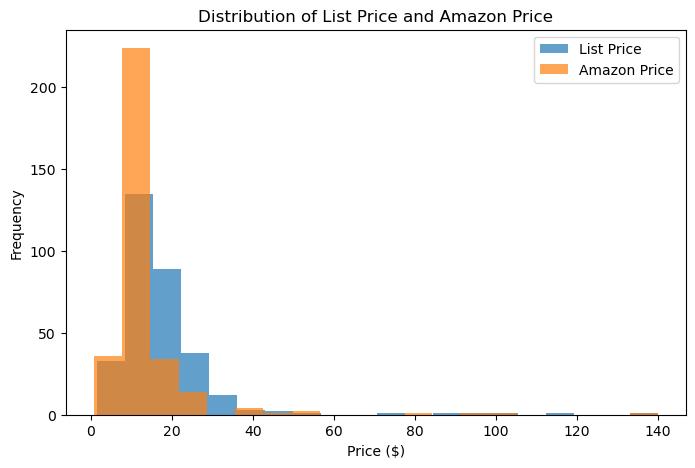

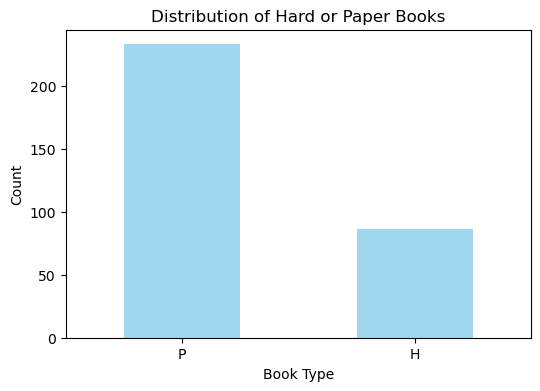

Summary Statistics:
                   Title        Author  List Price  Amazon Price  \
count                319           319  319.000000    319.000000   
unique               309           251         NaN           NaN   
top     The Great Gatsby  Jodi Picoult         NaN           NaN   
freq                   3             7         NaN           NaN   
mean                 NaN           NaN   18.362978     12.941034   
std                  NaN           NaN   13.976755     12.436673   
min                  NaN           NaN    1.500000      0.770000   
25%                  NaN           NaN   13.890000      8.600000   
50%                  NaN           NaN   15.000000     10.200000   
75%                  NaN           NaN   19.360000     12.560000   
max                  NaN           NaN  139.950000    139.950000   

       Hard_or_Paper    NumPages Publisher     Pub year    ISBN-10       Thick  
count            319  319.000000       319   319.000000        319  319.000000  
u

In [6]:
import matplotlib.pyplot as plt

# Summary statistics of the dataset
summary_stats = ab_reduced_noNaN.describe(include='all')

# Check unique values for categorical columns
categorical_summary = ab_reduced_noNaN.select_dtypes("category").nunique()

# Distribution of `List Price` and `Amazon Price`
plt.figure(figsize=(8, 5))
plt.hist(ab_reduced_noNaN['List Price'], bins=20, alpha=0.7, label='List Price')
plt.hist(ab_reduced_noNaN['Amazon Price'], bins=20, alpha=0.7, label='Amazon Price')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of List Price and Amazon Price')
plt.legend()
plt.show()

# Bar plot for the distribution of `Hard_or_Paper`
plt.figure(figsize=(6, 4))
ab_reduced_noNaN['Hard_or_Paper'].value_counts().plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Distribution of Hard or Paper Books')
plt.xlabel('Book Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Displaying the results
print("Summary Statistics:")
print(summary_stats)

# Display unique value counts for categorical variables
print("\nUnique Values in Categorical Columns:")
print(categorical_summary)



### Question 4 

In [7]:
from sklearn.model_selection import train_test_split

# Create an 80/20 split for training and testing sets
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42)

# Display the sizes of the resulting datasets
train_size = ab_reduced_noNaN_train.shape[0]
test_size = ab_reduced_noNaN_test.shape[0]

train_size, test_size

(255, 64)

The two steps are preparing the data for fitting a DecisionTreeClassifier model by separating features (X) and the target variable (y), and transforming the target variable into a binary format. 

**Target Variable Transformation** 

 1. y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

    a. "pd.get_dummies()" is a function that converts the categorical variable Hard_or_Paper into one-hot encoded columns, creating separate columns for P (Paperback) and H (Hardcover)
    
    b. By selecting ['H'], the code extracts the column corresponding to H and assigns it to. y
    
    c. This column will contain 1 if the book is a hardcorver (H) and 0 for otherwise (for paperback P)
    
    PURPOSE:
    
    - Y becomes a **binary target variable** suitable for classification tasks in scikit-learn
    
**Feature Selection**

 1. X = ab_reduced_noNaN[['List Price']]
 
     a. The code selects the List Price column from the dataset as the feature set (X) for training the model
     
     b. The result is a DataFrame containing only the List Price feature
     
     PURPOSE: 
     
     - This specifies that the model will use the List Price feature to predict whether a book is a hardcover (H) or not. 
     
In summary, these two steps sets up the classification problem for the DecisionTreeClassifier, where the goal is to predict if a book is hardcover (H) based on its list price (List Price). 

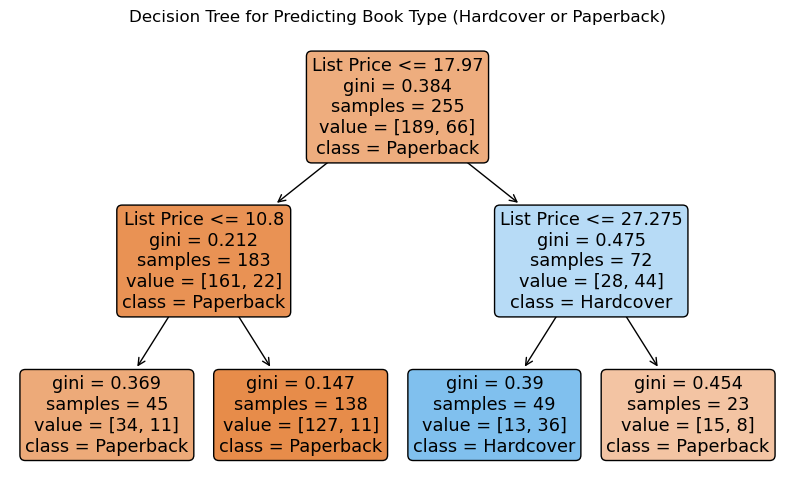

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Define the feature (X) and target (y)
X = ab_reduced_noNaN_train[['List Price']]
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Train the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Plot the decision tree to explain predictions
plt.figure(figsize=(10, 6))
tree.plot_tree(
    clf, 
    feature_names=['List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True, 
    rounded=True
)
plt.title("Decision Tree for Predicting Book Type (Hardcover or Paperback)")
plt.show()


# Post-Lecture

### Question 5

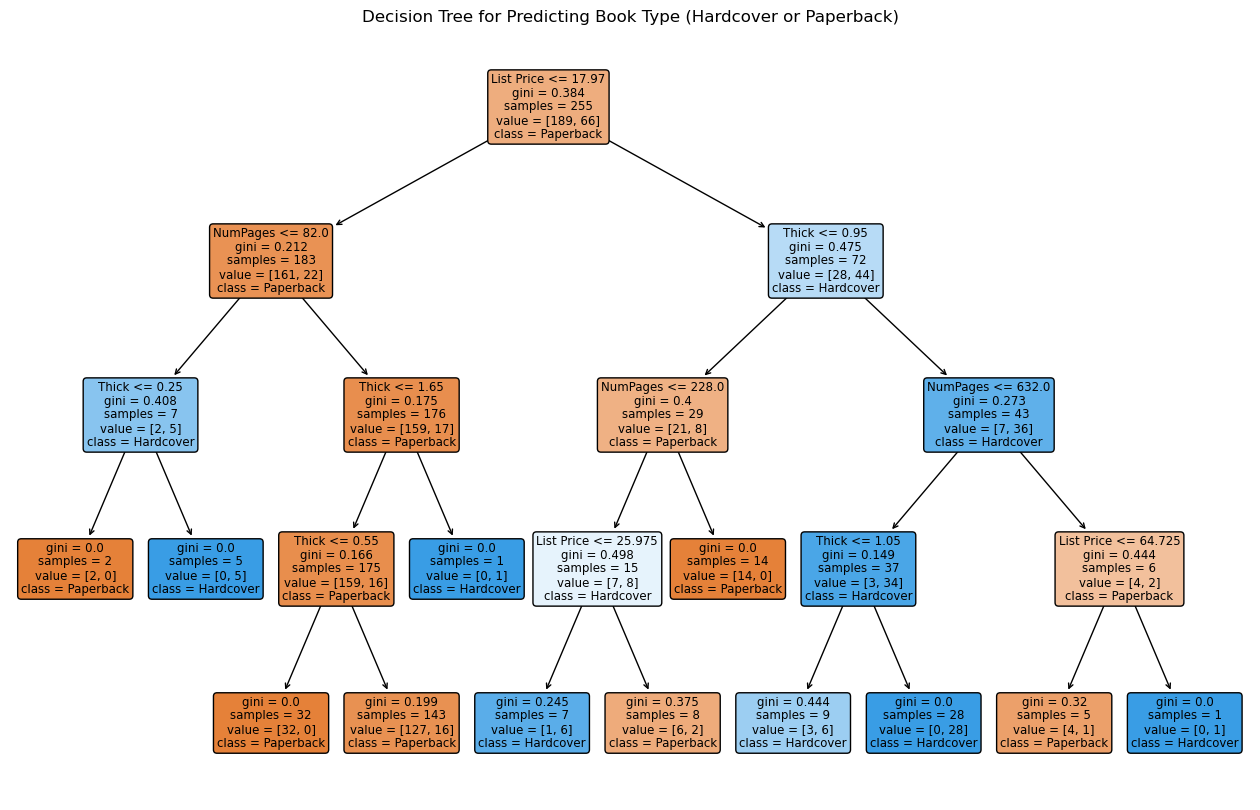

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Define the feature (X) and target (y)
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Train the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Plot the decision tree to explain predictions
plt.figure(figsize=(16, 10))
tree.plot_tree(
    clf2, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=['Paperback', 'Hardcover'], 
    filled=True, 
    rounded=True
)
plt.title("Decision Tree for Predicting Book Type (Hardcover or Paperback)")
plt.show()


### Question 6

In [13]:
import numpy as np

# Redefine training and testing data based on the cleaned dataset
X_train_clf = ab_reduced_noNaN_train[['List Price']]
y_train_clf = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

X_test_clf = ab_reduced_noNaN_test[['List Price']]
y_test_clf = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

X_train_clf2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Retrain both models and compute metrics
clf.fit(X_train_clf, y_train_clf)
clf2.fit(X_train_clf2, y_train_clf)

# Make predictions for both models
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Compute confusion matrices
conf_matrix_clf = confusion_matrix(y_test_clf, y_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test_clf, y_pred_clf2)

# Calculate sensitivity, specificity, and accuracy for clf
tn_clf, fp_clf, fn_clf, tp_clf = conf_matrix_clf.ravel()
sensitivity_clf = recall_score(y_test_clf, y_pred_clf)
specificity_clf = tn_clf / (tn_clf + fp_clf)
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)

# Calculate sensitivity, specificity, and accuracy for clf2
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = conf_matrix_clf2.ravel()
sensitivity_clf2 = recall_score(y_test_clf, y_pred_clf2)
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)
accuracy_clf2 = accuracy_score(y_test_clf, y_pred_clf2)

# Display results
results = {
    "Model": ["clf", "clf2"],
    "Sensitivity": [sensitivity_clf, sensitivity_clf2],
    "Specificity": [specificity_clf, specificity_clf2],
    "Accuracy": [accuracy_clf, accuracy_clf2],
    "Confusion Matrix": [conf_matrix_clf, conf_matrix_clf2]
}

results_df = pd.DataFrame(results)
# Round metrics to 3 significant digits
sensitivity_clf = np.round(sensitivity_clf, 3)
specificity_clf = np.round(specificity_clf, 3)
accuracy_clf = np.round(accuracy_clf, 3)

sensitivity_clf2 = np.round(sensitivity_clf2, 3)
specificity_clf2 = np.round(specificity_clf2, 3)
accuracy_clf2 = np.round(accuracy_clf2, 3)

# Display results
print("Model Evaluation Metrics:")
print("------------------------------------------------")
print("Model: clf")
print(f"Sensitivity: {sensitivity_clf}")
print(f"Specificity: {specificity_clf}")
print(f"Accuracy: {accuracy_clf}")
print(f"Confusion Matrix:\n{conf_matrix_clf}")
print("------------------------------------------------")
print("Model: clf2")
print(f"Sensitivity: {sensitivity_clf2}")
print(f"Specificity: {specificity_clf2}")
print(f"Accuracy: {accuracy_clf2}")
print(f"Confusion Matrix:\n{conf_matrix_clf2}")




Model Evaluation Metrics:
------------------------------------------------
Model: clf
Sensitivity: 0.7
Specificity: 0.909
Accuracy: 0.844
Confusion Matrix:
[[40  4]
 [ 6 14]]
------------------------------------------------
Model: clf2
Sensitivity: 0.75
Specificity: 0.909
Accuracy: 0.859
Confusion Matrix:
[[40  4]
 [ 5 15]]


### Question 7

The difference between the two confusion matrices are caused by the features used for predictions and the corresponding decision boundaries that the model is trained to learn. 

The key differences are as follows: 

  1. Differences in features used in training
      a. Confusion Matrix 1: Model clf is trained using only the feature List Price
      b. Confusion Matrix 2: Model is trained using the features NumPages, Thick, and List Price 

The second confusion matrix better captures the relatinships in data by creating more complex decision boundaries (since it includes additional features), but could lead to overfitting or altered predictions on the training data. 

  2. Model complexity
      a. Second model has more predictors, which allows it to evaluate additional dimensions of the data. As a result, it may classify some data points differently than the simpler decision tree based on one predictor (List Price) 
      
  3. Information in Features 
      a. List Price alone may capture some correlation with the outcome, but probably not all the complexity of the problem. 
      
      b. NumPages, Thick, and List Price provide additional information that could improve classification but at the same time, if they're less predictive, it will introduce noise. 

The confusion matrices me and the Chatbot created together are better because of the following reasons: 

  1. Our confusion matrices evaluated the model on testing data (ab_reduced_noNaN_test), which is unseen during training. This is a more accurate measure of how well the model generalizes new data.
  
  The provided confusion matrices evaluated the model on training data (ab_reduced_noNaN_train), which the model has already seen. Since the model is familiar with the patterns in the data, it will likely lead to overly optimistic results. 
  
  2. Our model properly split the dataset into training and testing sets which ensures that the model's performance metrics are derived from data not used in model building.
  
  3. Our model allows us to detect overfitting by observing how well the models generalize to unseen data. For example, if a model performs well on training data but poorly on test data, there is an indicator of overfitting 

In summary, the confusion matrices that me and ChatGPT created are better since they're based on a proper train-test split, which allows for a realistic and accurate evaluation of model performance. The matrices in the provided homework code are based on training data, which is not as accurate and realistic. 

### Question 8 

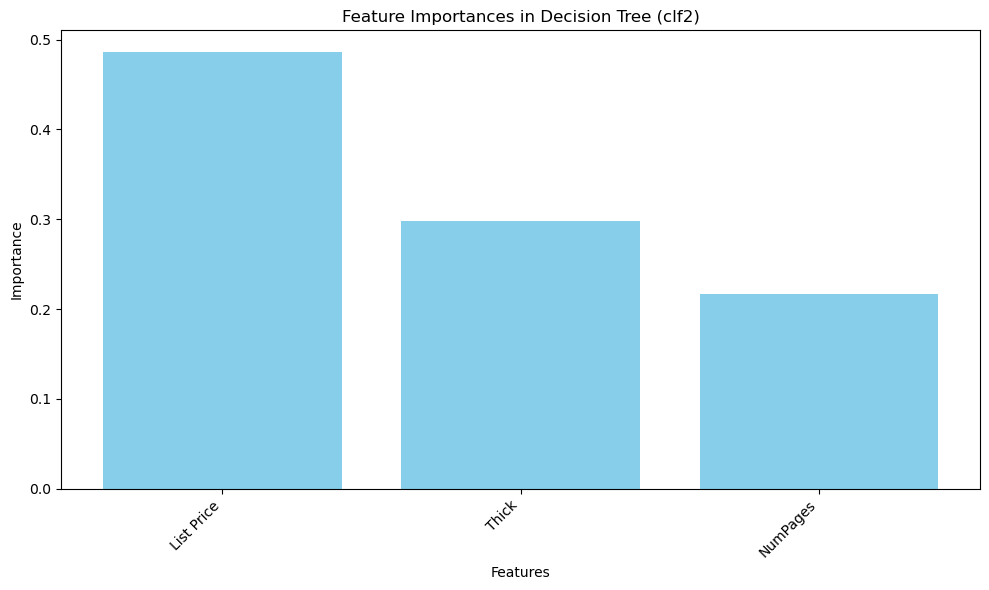

'List Price'

In [14]:
# Extract feature importances from clf2
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances and feature names
importances_clf2 = clf2.feature_importances_
feature_names_clf2 = X_train_clf2.columns  # Feature names corresponding to clf2

# Sort feature importances in descending order
indices_clf2 = np.argsort(importances_clf2)[::-1]

# Plot feature importances for clf2
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances_clf2)), importances_clf2[indices_clf2], align="center", color="skyblue")
plt.xticks(range(len(importances_clf2)), feature_names_clf2[indices_clf2], rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances in Decision Tree (clf2)")
plt.tight_layout()
plt.show()

# Report the most important feature
most_important_feature = feature_names_clf2[indices_clf2[0]]
most_important_feature


List prices appears to be the most important predictor variables for making predictions according to clf2

### Question 9 

In linear regression, coefficients quantify the direct relationship between each predictor and the outcome, assuming other variables are constant, indicating the change in the outcome for a one-unit change in the predictor. Feature importances in deicsion trees measure each feature's contribution to splits using metrics like information gain or Gini reduction. Unlike regression coefficients, they do not reflect direct relationships and depend on feature ineractions and tree structures. 

### Question 10

Yes 

# Pre-Lecture Chatbot Summary (LINK: https://chatgpt.com/share/673fe6a8-04ec-8003-b526-0ba142827309)


## Decision Tree Classifier for Predicting Book Type

### Objective
The goal was to train a Decision Tree Classifier using the `List Price` variable to predict whether a book is a **hardcover** (`H`) or a **paperback** (`P`).

### Steps
1. **Feature Selection**:
   - Used `List Price` as the single predictor variable (`X`).
   - Target variable (`y`) was the binary encoding of `Hard_or_Paper`, where `1` represents hardcover and `0` represents paperback.

2. **Model Training**:
   - A `DecisionTreeClassifier` from scikit-learn was trained with the following parameters:
     - `max_depth=2`: Restricting the depth of the tree to two levels for simplicity and interpretability.
     - `random_state=42`: Ensures reproducibility.

3. **Visualization**:
   - A decision tree plot was generated using `tree.plot_tree()` to explain the predictions.
   - Each node shows:
     - The splitting condition for `List Price`.
     - The predicted class at each leaf (`Paperback` or `Hardcover`).
     - The class distribution for samples reaching the node.

### Insights
- The decision tree splits the data into segments based on `List Price` thresholds.
- At each node, the model decides whether the book is more likely to be a hardcover or a paperback based on the price range.
- This simple model provides an interpretable way to understand how `List Price` impacts the likelihood of a book being a hardcover or paperback.

### Conclusion
The trained decision tree demonstrates how a single predictor variable (`List Price`) can effectively classify books into hardcover or paperback categories using straightforward decision rules.


# Post-Lecture Chatbot Summary (LINK: https://chatgpt.com/share/673ff046-f640-8003-90c3-4b59a3e86014 )

### Summary of Session on Decision Trees and Feature Importances

1. **Building and Visualizing Decision Trees**:
   - We trained two decision tree models:
     - `clf`: A decision tree using only the predictor `List Price` with a maximum depth of 2.
     - `clf2`: A decision tree using predictors `NumPages`, `Thick`, and `List Price` with a maximum depth of 4.
   - Both models were visualized using `tree.plot_tree()` to explain how the splits are made based on the chosen predictors.

2. **Evaluating Model Performance**:
   - We split the data into training and testing sets to avoid overfitting and ensure robust evaluation.
   - Confusion matrices were generated for both models on the testing set, providing insights into their predictive performance.
   - Metrics such as **sensitivity**, **specificity**, and **accuracy** were calculated for both models:
     - `clf` performed better in terms of sensitivity and overall accuracy compared to `clf2`, but `clf2` had a slightly better specificity.

3. **Feature Importances in Decision Trees**:
   - Decision tree models rank features by their relative importance in making predictions using the `.feature_importances_` attribute.
   - For `clf2`, we visualized the feature importances using a bar chart and found that `List Price` was the most important predictor for determining whether a book is hardcover or paperback.
   - Feature importance provides insight into how predictors contribute to the overall explanatory power of the model.

4. **Comparison with Linear Regression**:
   - In linear regression, coefficients directly represent the relationship between predictors and the outcome, making them easier to interpret.
   - Decision trees, in contrast, rely on complex interactions and splits, but feature importance scores provide a heuristic for understanding the relative contributions of predictors.

5. **GridSearchCV for Hyperparameter Tuning**:
   - GridSearchCV was introduced as a tool for optimizing model hyperparameters, such as `max_depth` and `min_samples_split`.
   - It systematically tests combinations of hyperparameters using cross-validation and identifies the best settings for improved generalization.

6. **Differences Between Training and Testing Confusion Matrices**:
   - Evaluating models on training data can lead to overly optimistic results due to overfitting.
   - By testing on unseen data (test set), we obtained realistic confusion matrices that reflect how well the models generalize.

### Key Takeaways:
- Always evaluate models on testing data to ensure robust performance metrics.
- Feature importances in decision trees are useful but should be interpreted as relative contributions, not direct effects like linear regression coefficients.
- Tools like GridSearchCV help balance complexity and generalization, preventing overfitting in decision tree models.
